In [69]:
import os, glob
import wrftools as wrf
import wrfproc as wp
import pandas as pd
import numpy as np
import genutils as gu
from matplotlib import pyplot as plt
import importlib
importlib.reload(wrf)
importlib.reload(wp);

In [70]:
run='run_02_CTRL'
flist=wrf.wolist(run)

In [71]:
df=pd.DataFrame(columns=['tlf','t','tp','x','y'])

for f in flist:
    print(f)
    t=wrf.getElapsedDays(run,f,rst=False)
    trst=wrf.getElapsedDays(run,f,rst=True)
    tlf=np.round(t-trst,5)
    tp=wrf.getWRF(wrf.wopath(run,f),'tp')
    x,y=wrf.getCoords(wrf.wopath(run,f))
    row=pd.Series({'t':t,'tlf':tlf,'tp':tp,'x':x,'y':y})
    df=df.append(row,ignore_index=True)
    

wrfout_d03_2007-09-01_00:00:00
wrfout_d03_2007-09-01_01:00:00
wrfout_d03_2007-09-01_02:00:00
wrfout_d03_2007-09-01_03:00:00
wrfout_d03_2007-09-01_04:00:00
wrfout_d03_2007-09-01_05:00:00
wrfout_d03_2007-09-01_06:00:00
wrfout_d03_2007-09-01_07:00:00
wrfout_d03_2007-09-01_08:00:00
wrfout_d03_2007-09-01_09:00:00
wrfout_d03_2007-09-01_10:00:00
wrfout_d03_2007-09-01_11:00:00
wrfout_d03_2007-09-01_12:00:00
wrfout_d03_2007-09-01_13:00:00
wrfout_d03_2007-09-01_14:00:00
wrfout_d03_2007-09-01_15:00:00
wrfout_d03_2007-09-01_16:00:00
wrfout_d03_2007-09-01_17:00:00
wrfout_d03_2007-09-01_18:00:00
wrfout_d03_2007-09-01_19:00:00
wrfout_d03_2007-09-01_20:00:00
wrfout_d03_2007-09-01_21:00:00
wrfout_d03_2007-09-01_22:00:00
wrfout_d03_2007-09-01_23:00:00
wrfout_d03_2007-09-02_00:00:00
wrfout_d03_2007-09-02_01:00:00
wrfout_d03_2007-09-02_02:00:00
wrfout_d03_2007-09-02_03:00:00
wrfout_d03_2007-09-02_04:00:00
wrfout_d03_2007-09-02_05:00:00
wrfout_d03_2007-09-02_06:00:00
wrfout_d03_2007-09-02_07:00:00
wrfout_d

In [84]:
dfd=df.diff()
dfm=df.rolling(2).mean()
dfd['t']=dfm['t']
dfd['tlf']=dfm['tlf']
dfd['x']=df['x']
dfd['y']=df['y']
dfd=dfd[1:]

def get_rain_in_r(x,y,tp,r):
    xg,yg=np.meshgrid(x,y)
    rg=np.sqrt(xg**2+yg**2)
    return(np.sum(tp[rg<r]))

tprs=[]
for row in dfd.iterrows():
    tpr=get_rain_in_r(row[1].x,row[1].y,row[1].tp,200000)
    tprs.append(tpr)
dfd['tpr']=tprs

In [85]:
dfd

,tlf,t,tp,x,y,tpr
1,0.0,0.020833,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-563999.9655761719, -562666.6323242188, -5613...","[-559999.9658203125, -558666.6325683594, -5573...",0.000000
2,0.0,0.062500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-571999.9650878906, -570666.6318359375, -5693...","[-577333.2980957031, -575999.96484375, -574666...",0.000000
3,0.0,0.104167,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-581333.2978515625, -579999.9645996094, -5786...","[-573333.2983398438, -571999.9650878906, -5706...",0.002586
4,0.0,0.145833,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-561333.2990722656, -559999.9658203125, -5586...","[-582666.6311035156, -581333.2978515625, -5799...",2768.814209
5,0.0,0.187500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-559999.9658203125, -558666.6325683594, -5573...","[-566666.6320800781, -565333.298828125, -56399...",2597.650879
...,...,...,...,...,...,...
347,0.0,14.437500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-719999.9560546875, -718666.6228027344, -7173...","[-631999.9614257812, -630666.6281738281, -6293...",373010.718750
348,0.0,14.479167,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-710666.6232910156, -709333.2900390625, -7079...","[-639999.9609375, -638666.6276855469, -637333....",400272.093750
349,0.0,14.520833,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-709333.2900390625, -707999.9567871094, -7066...","[-646666.6271972656, -645333.2939453125, -6439...",419117.687500
350,0.0,14.562500,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-717333.2895507812, -715999.9562988281, -7146...","[-626666.6284179688, -625333.2951660156, -6239...",407447.937500


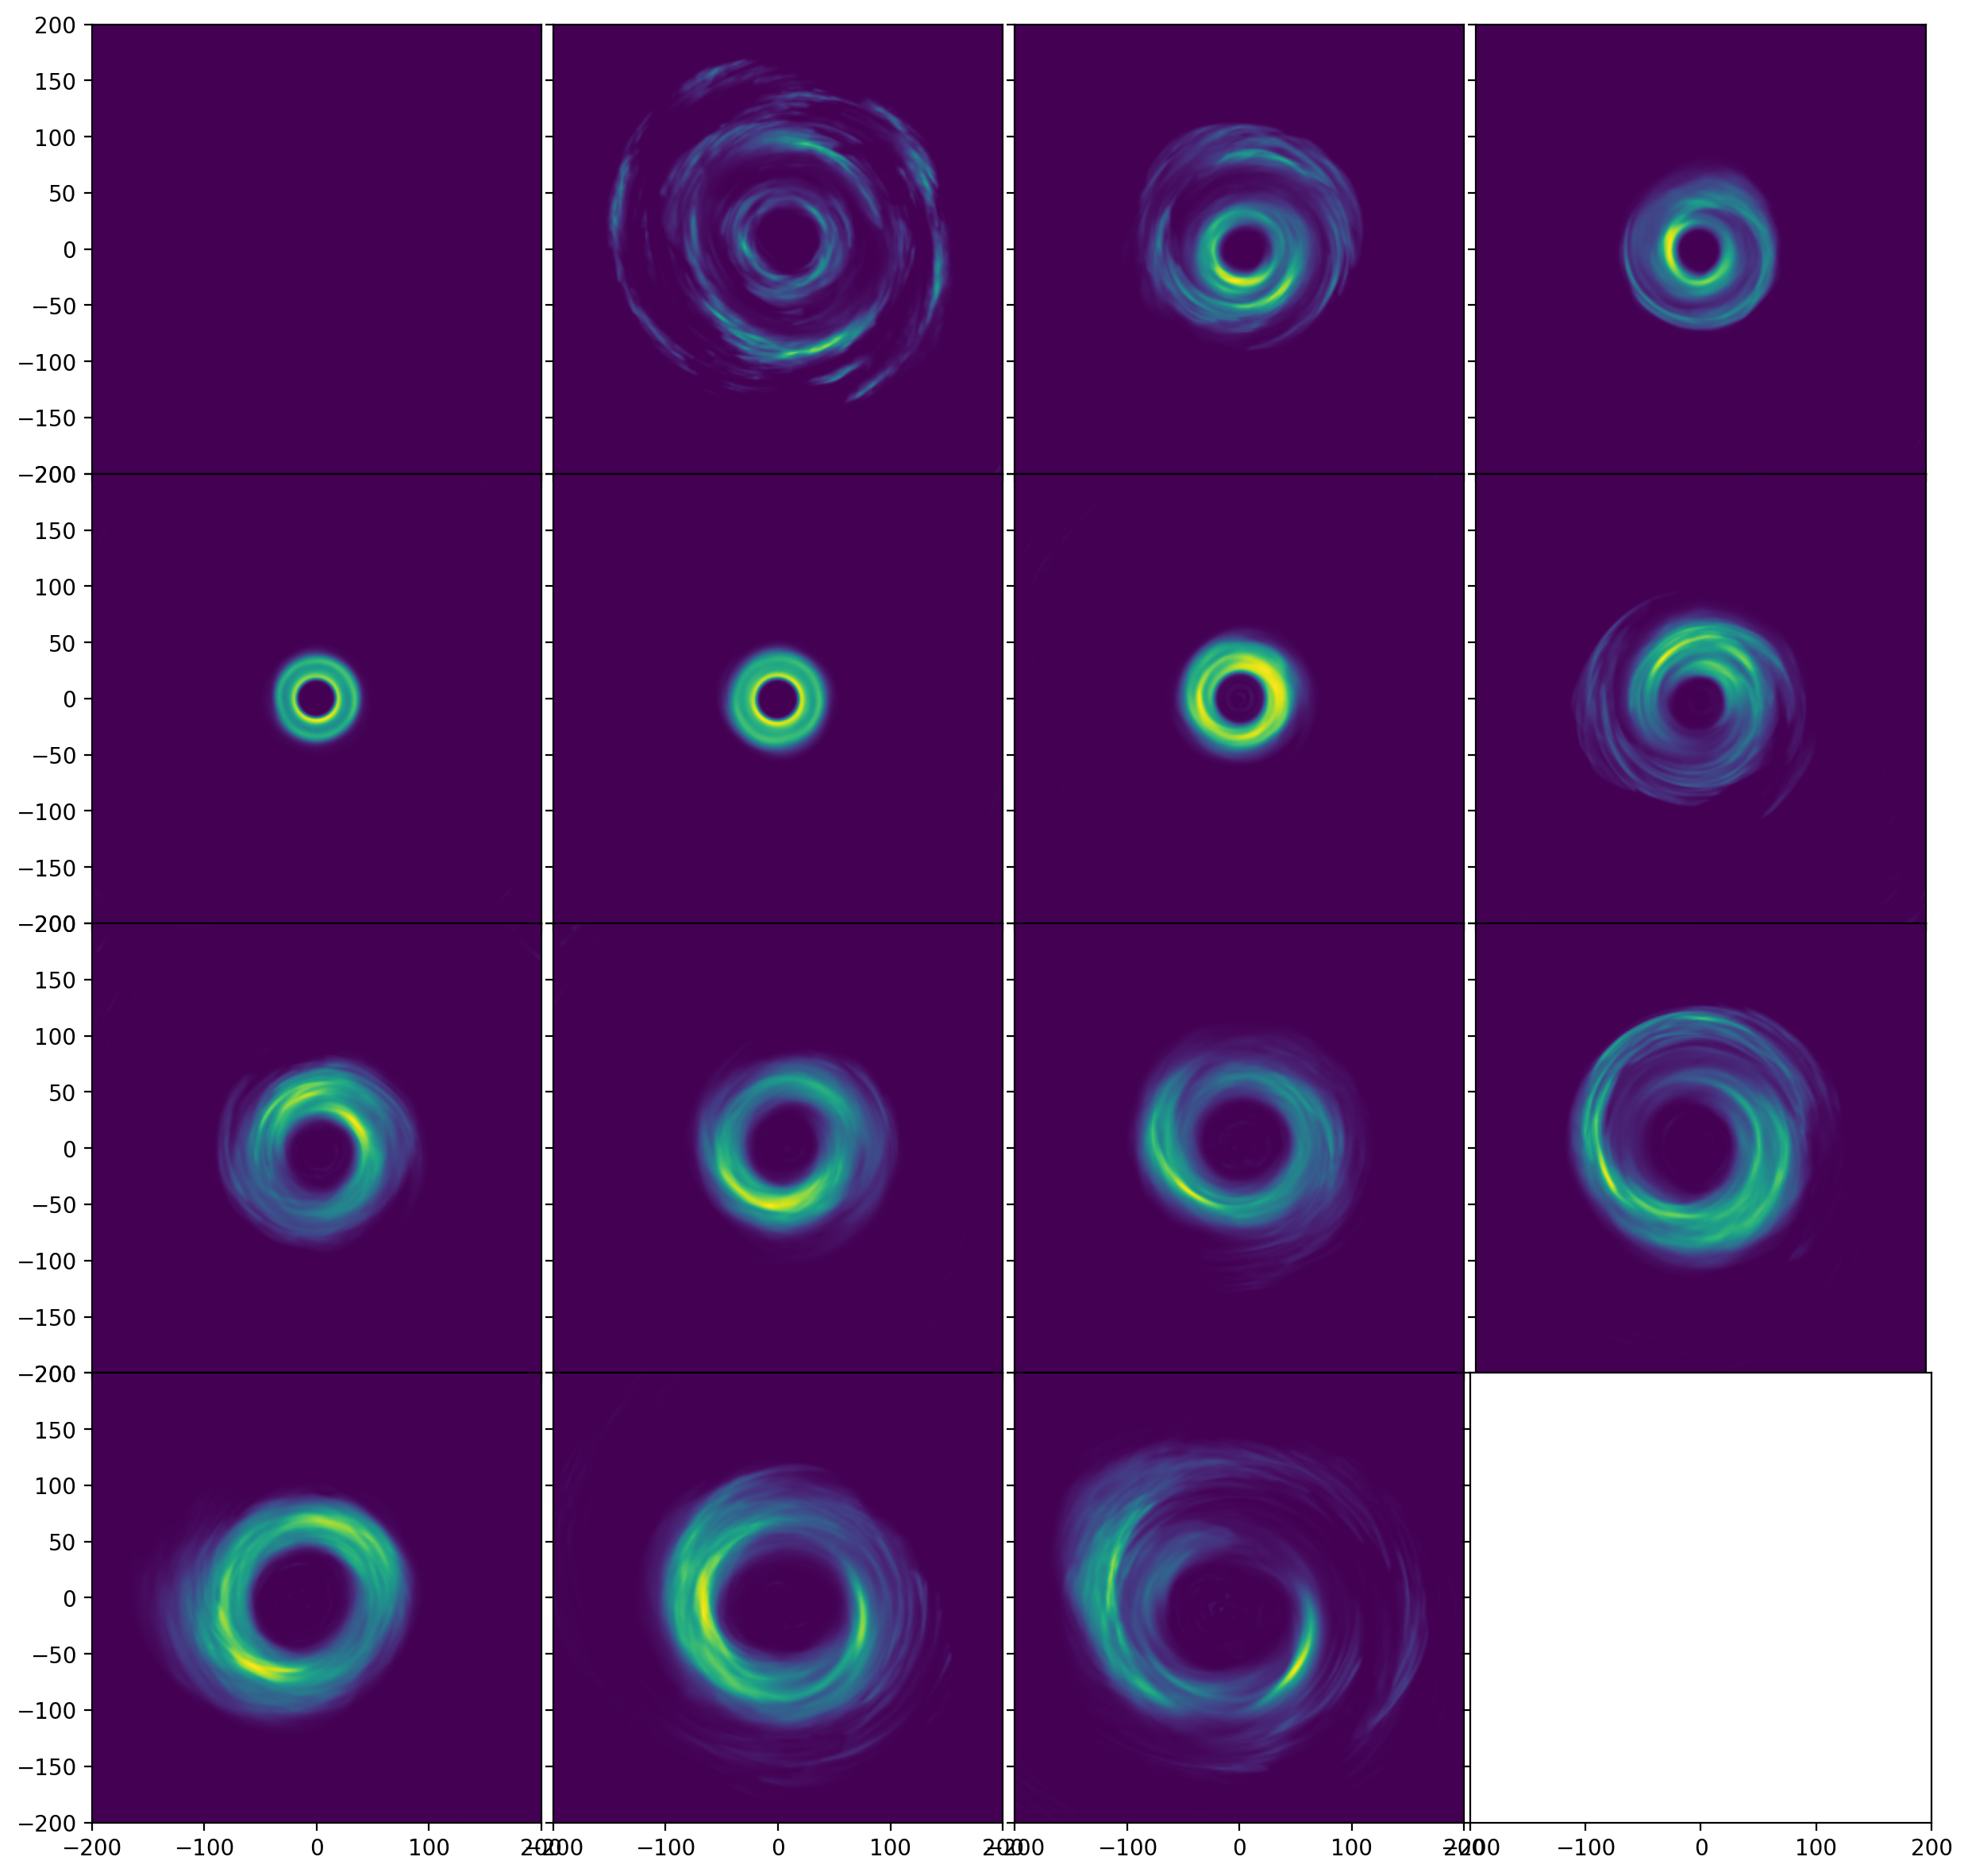

In [49]:
fig,axs=plt.subplots(4,4,dpi=200,figsize=(15,15),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0,wspace=0)
xr=200
for i in range(0,15):
    dfi=dfd.iloc[0+24*i]
    ax=axs.flat[i]
    gu.imshowxy(dfi['y']/1000,dfi['x']/1000,dfi['tp'],ax=ax)
    ax.set_xlim((-xr,xr))
    ax.set_ylim((-xr,xr));
    ax.set_aspect('equal')

def get_rain_in_r(x,y,tp,r):
    xg,yg=np.meshgrid(x,y)
    rg=np.sqrt(xg**2+yg**2)
    return(np.sum(tp[rg<r]))

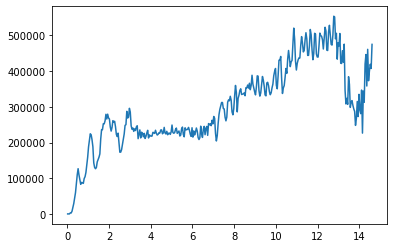

In [86]:
plt.plot(dfd.t,dfd.tpr)